# Deep Learning -  Neural Net challenge

## Predict wine-class using a Keras deep learning model

### Load the libraries

In [1]:
# load libraries
import matplotlib.pyplot as plt    
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

from tensorflow import keras 
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2

from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD

from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

### Load data

In [2]:
df = pd.read_csv("wine.csv", index_col = "index")


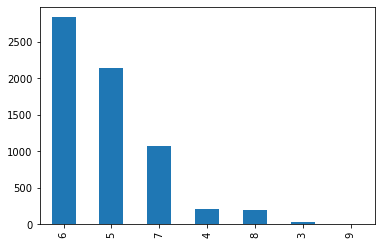

In [3]:
# Distribution of output or target variable
df['quality'].value_counts().plot.bar()
plt.show()

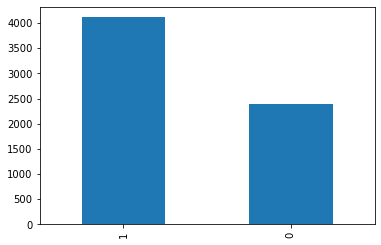

1    4113
0    2384
Name: quality, dtype: int64


In [6]:
# Transform target to binary values and check its distribution
df2 =df.copy()
df2['quality'] = df2['quality'].apply(lambda x: 0 if x < 6 else 1)
df2['quality'].value_counts().plot.bar()
plt.show()
# with this transformation the new values 0 represent for values from [3-5] and 1: [6-9]
print(df2['quality'].value_counts())

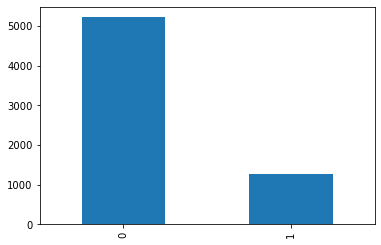

0    5220
1    1277
Name: quality, dtype: int64


In [7]:
# Transform target to binary values and check its distribution
df3 =df.copy()
df3['quality'] = df3['quality'].apply(lambda x: 0 if x < 7 else 1)
df3['quality'].value_counts().plot.bar()
plt.show()
# with this transformation the new values 0 represent for values from [3-6] and 1: [7-9]
print(df3['quality'].value_counts())

#So we choose the good wine quality (1) with a range from 6-9 in the previous scale that make more sense 

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

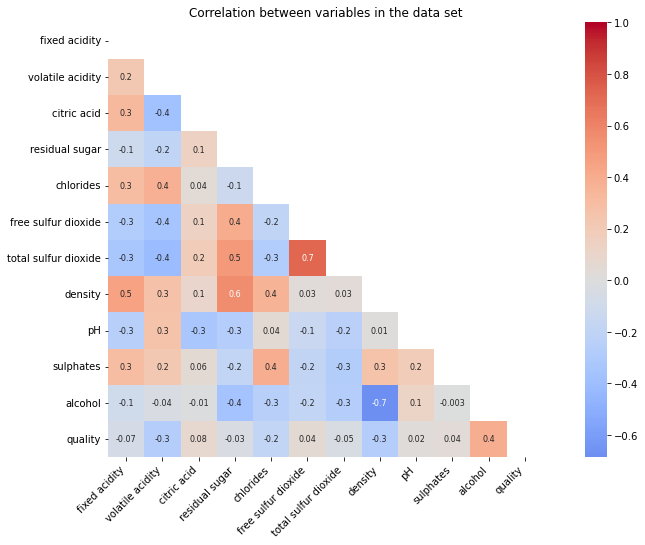

In [43]:
matrix = np.triu(df.corr())
plt.figure(figsize = (15,8))
plt.title('Correlation between variables in the data set')

corr = df.corr()
ax = sns.heatmap(corr, center=0, annot = True, fmt='.1g', mask=matrix, vmin=corr.values.min(), vmax=1,
                 cmap= 'coolwarm', square=True, annot_kws={"size":8})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [9]:
# Find the column with high correlation
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) > 0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [ ]:
interested_features = df[[
    "fixed acidity",
    "volatile acidity",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    #"total sulfur dioxide",
    "density",
    "sulphates"
]]
df_interested  = interested_features.copy()
df_interested

## Data preprocessing

In [ ]:
X = df.iloc[:, 0:11]
X.shape

In [ ]:
# Transform the target to Binary
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)
y = df.iloc[:, 11]

In [ ]:
y.value_counts()

In [ ]:
#X = ((X - X.mean()) / X.std()).to_numpy()
#y = df['quality'].to_numpy()

In [ ]:
# Preprocess The X Data By Scaling whole set of Feature dataset

#from sklearn.preprocessing import StandardScaler 

#scaler = StandardScaler().fit(features)
#features = scaler.transform(features)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)


In [ ]:
X_train.shape

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Preprocess The X Data By Scaling X_train
#sc = StandardScaler(with_mean=True, with_std=True)
#sc.fit(X_train)
# Apply the scaler to the X training data
#X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
#X_test_std = sc.transform(X_test)

### Define the keras model

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the Keras model

In [ ]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

### Fit the keras model on the dataset

In [ ]:
history = model.fit(X_train, y_train, epochs= 50, batch_size=1, validation_split = 0.1, verbose = 1)

In [ ]:
#val_loss, val_acc = model.evaluate(X_test, y_test)
#print(val_loss)
#print(val_acc)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate the keras model

In [ ]:

_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Plotting confusion matrix

In [ ]:
# make probability predictions with the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ["bad", "good"]
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['bad', 'good']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Make predictions

In [ ]:
# End-to-End function


def base_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=11,
                    kernel_initializer='normal', activation='tanh'))
    model.add(Dense(512, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(64, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model


models = []
estimator = KerasRegressor(build_fn=base_model,
                           nb_epoch=50, verbose=0)
models.append(('Neural Network', estimator))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=100)))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('SVR', SVR(gamma='auto')))

for name, model in models[:1]:
    kfold = KFold(n_splits=10, shuffle=True)
    results = np.sqrt(-1 * cross_val_score(model, X,
                                           y, scoring='neg_mean_squared_error', cv=kfold))
    print("{}: {}".format(name, results.mean()))

## Using Machine learning to predict Wine quality with the same dataframe

### Compare the accuracy of baseline model and the other machine learning models

In [ ]:
df = pd.read_csv("wine.csv", index_col = "index")
X = df.iloc[:, 0:11]
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)
y = df.iloc[:, 11]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
# creating normalization object 
# fit data

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def base_model():
    #model = Sequential()
#     model.add(Dense(256, input_dim=11, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(128, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(16, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy',
#                   optimizer='adam', metrics=['accuracy'])
#     return model
    
    model = Sequential()
    model.add(Dense(22, input_dim=11, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='optimizer', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='optimizer', metrics=['accuracy'])

    return model

models = []
estimator = KerasClassifier(build_fn=base_model,
                            nb_epoch=50, verbose=1)
models.append(('NeuralNet', estimator))
models.append(('KNN', KNeighborsClassifier(3)))
models.append(('SVC', SVC(gamma=2, C=1)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=5)))
models.append(('RandomForest', RandomForestClassifier(max_depth=5)))
models.append(('MLP', MLPClassifier(alpha=1, max_iter=1000)))
models.append(('AdaBoost', AdaBoostClassifier(3)))
models.append(('GaussianNB', GaussianNB(3)))
models.append(('QuadraticDiscrimination', QuadraticDiscriminantAnalysis()))


for name, model in models:
    results = cross_val_score(model, X_train, y_train, cv=10)
    print("{}: {}".format(name, results.mean()))
    
###Results will be:
# NeuralNet: nan
# KNN: 0.8357147698116861
# SVC: 0.8671665779154767
# DecisionTree: 0.814164689935615
# RandomForest: 0.8310959965144986
# MLP: 0.8284518565135306
# AdaBoost: nan
# GaussianNB: nan
# QuadraticDiscrimination: 0.7697255167739749

In [ ]:
# Standardize by employing MinMaxScaler()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)
# display values
#print(new_Xtrain)

In [ ]:
#RandomForest Classifier

from sklearn.metrics import classification_report, mean_squared_error
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_Xtrain, y_train)
# predicting score
rnd_score = rnd.score(new_Xtest,y_test)
print('score of model is : ',rnd_score)

y_predict = rnd.predict(X_test) 
# display error rate
print('Calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('Mean squared error is : ',rnd_MSE)
# display RMSE
print('Root mean squared error is : ',rnd_RMSE)
print(classification_report(y_predict,y_test))

In [ ]:
rnd = RandomForestClassifier()

y_predict = list(fit_rnd.predict(X_test))
predicted_df = {'predicted_values': y_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

In [ ]:
import pickle
file = 'wine_quality'
#save file
save = pickle.dump(rnd,open(file,'wb'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
  
# Initialize the constructor
model = Sequential()
  
model.add(Dense(12, activation ='relu', input_shape =(11, )))
model.add(Dense(9, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.output_shape
  
# Model summary
model.summary()
  
# Model config
model.get_config()
  
# List all weight tensorsb
model.get_weights()
model.compile(loss ='binary_crossentropy', 
  optimizer ='adam', metrics =['accuracy'])

In [ ]:
df = pd.read_csv("wine.csv", index_col = "index")
X = df.iloc[:, 0:11]
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)
y = df.iloc[:, 11]
print(X.shape)
print(y.shape)

In [ ]:
#confusion matrix

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)

clf = SVC(random_state=42)
clf.fit(X_train, y_train)
SVC(random_state=42)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot() 
print('Accurate score: ')

## Model Tuning

### Tuning our hyperparameter using Keras Tuner


In [ ]:
#https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/
from tensorflow import keras # importing keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # loading the data using keras datasets api
x_train = x_train.astype('float32') / 255.0 # normalize the training images
x_test = x_test.astype('float32') / 255.0 # normalize the testing images


In [ ]:
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28, 28))) # flattening 28 x 28 
model1.add(keras.layers.Dense(units=512, activation='relu', name='dense_1')) # you have 512 neurons with relu activation
model1.add(keras.layers.Dropout(0.2)) # we added a dropout layer with the rate of 0.2
model1.add(keras.layers.Dense(10, activation='softmax')) # output layer, where we have total 10 classes


In [ ]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [ ]:
model1.fit(x_train, y_train, epochs=10, validation_split=0.2)


In [ ]:
model1_eval = model.evaluate(img_test, label_test, return_dict=True)

## Hyperparameters - using Keras-turner

In [ ]:
df = pd.read_csv("wine.csv", index_col = "index")
X = df.iloc[:, 0:11]
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)
y = df.iloc[:, 11]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
# creating normalization object 
# fit data

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  '''
  Args:
    hp - Keras tuner object
  '''
  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(11, 11)))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', name='dense_1'))
  # Add next layers
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10, activation='softmax'))
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_accuracy', # objective to optimize
max_epochs=10,
factor=3, # factor which you have seen above 
directory='dir', # directory to save logs 
project_name='khyperband')

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

# Search space summary
# Default search space size: 2
# units (Int)
# {'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
# learning_rate (Choice)
# {'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}

### Step:- 4 ( Searching the best hyperparameter ) 


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Perform hypertuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])


In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]

### Step:- 5 ( Rebuilding and Training the Model with optimal hyperparameters ) 


In [ ]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hps)
h_model.summary()
h_model.fit(x_train, x_test, epochs=10, validation_split=0.2)

In [ ]:
h_eval_dict = h_model.evaluate(img_test, label_test, return_dict=True)


## GRIDSEARCH on models

In [ ]:
df = pd.read_csv("wine.csv", index_col = "index")
X = df.iloc[:, 0:11]
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)
y = df.iloc[:, 11]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
# creating normalization object 
# fit data

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#norm_fit = norm.fit(X_train)
#new_Xtrain = norm_fit.transform(X_train)
#new_Xtest = norm_fit.transform(X_test)

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
#https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ 
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(22, input_dim=11, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#param_grid = dict(optimizer=optimizer)
param_grid = dict(epochs=[10,20,30,50, 100])

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train) # modify features here
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))